In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv')

In [3]:
data.head(10)

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1
3,4,Aplilasi restart mulu,The app keep restarting,3,1
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0
5,6,"fitur chat dengan host tidak bisa digunakan, p...","The chat feature which is important, can't be ...",2,1
6,7,Mahal mahal.. kirain LBH murah dari refdorz da...,"Overpriced, at first I think it's cheaper than...",2,0
7,8,duh ini berisik amat yg diatas. Pake peredam d...,It's very noisy up there. Please add the sound...,2,0
8,9,"ribet pemesanan nya, pelayanan nya juga kurang...",It's not seamless anyway. The service is bad,2,1
9,10,APA APAAN HARUS UPDATE APP,"COME ON, I HAVE TO UPDATE THE APP FREQUENTLY",2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          700 non-null    int64 
 1   content             700 non-null    object
 2   translated_content  700 non-null    object
 3   priority_score      700 non-null    int64 
 4   problem_domain      700 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 27.5+ KB


In [6]:
data.describe()

,Unnamed: 0,priority_score,problem_domain
count,700.00000,700.000000,700.000000
mean,350.50000,2.184286,0.185714
std,202.21688,0.757629,0.389154
min,1.00000,1.000000,0.000000
25%,175.75000,2.000000,0.000000
50%,350.50000,2.000000,0.000000
75%,525.25000,3.000000,0.000000
max,700.00000,3.000000,1.000000


In [7]:
data.dtypes

Unnamed: 0             int64
content               object
translated_content    object
priority_score         int64
problem_domain         int64
dtype: object

In [8]:
data.isnull().sum(axis=0)

Unnamed: 0            0
content               0
translated_content    0
priority_score        0
problem_domain        0
dtype: int64

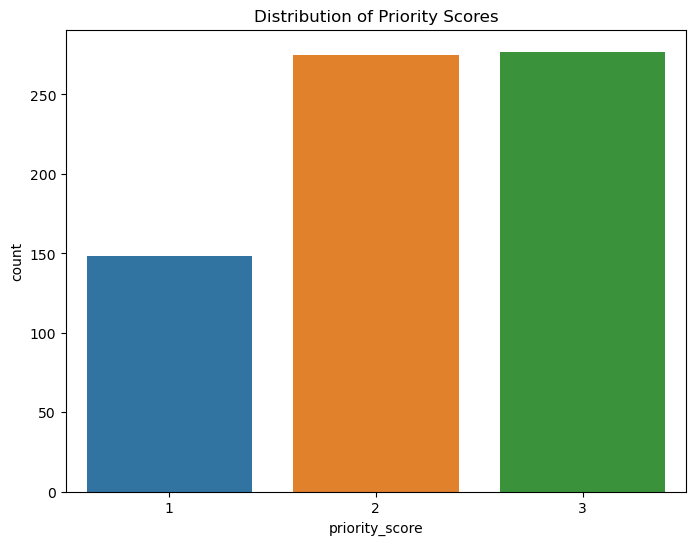

In [9]:
# Plot distribution of priority_score
plt.figure(figsize=(8, 6))
sns.countplot(x='priority_score', data=data)
plt.title('Distribution of Priority Scores')
plt.show()

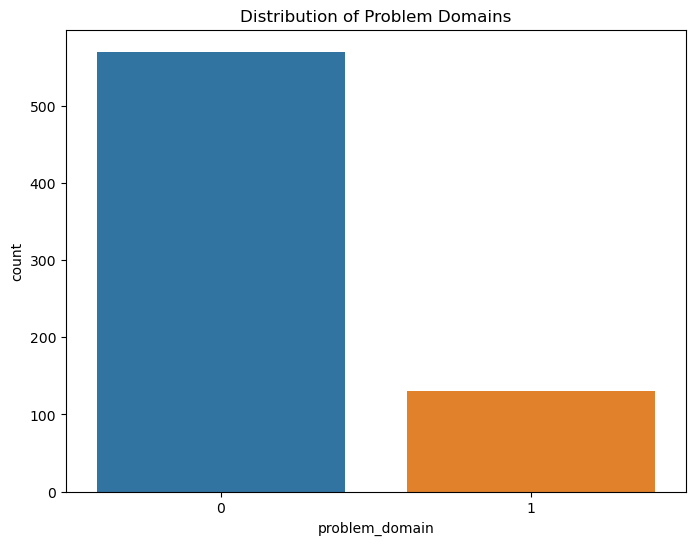

In [10]:
# Plot distribution of problem_domain
plt.figure(figsize=(8, 6))
sns.countplot(x='problem_domain', data=data)
plt.title('Distribution of Problem Domains')
plt.show()

In [11]:
# Generate word cloud of translated content
text = " ".join(review for review in data.translated_content)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

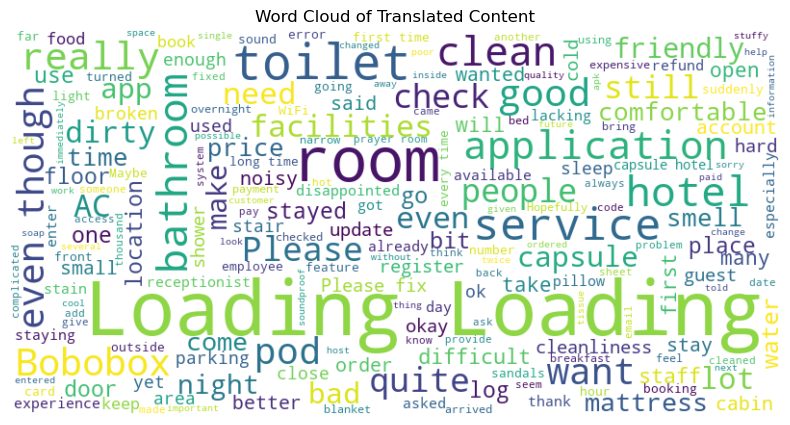

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Translated Content')
plt.show()

In [13]:
# Add a new column for content length
data['content_length'] = data['translated_content'].apply(len)

C:\Users\tomar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


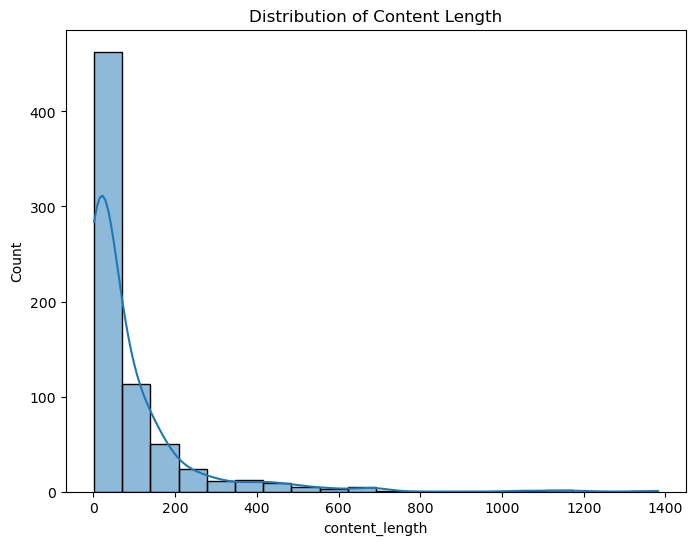

In [14]:
# Plot distribution of content length
plt.figure(figsize=(8, 6))
sns.histplot(data['content_length'], bins=20, kde=True)
plt.title('Distribution of Content Length')
plt.show()

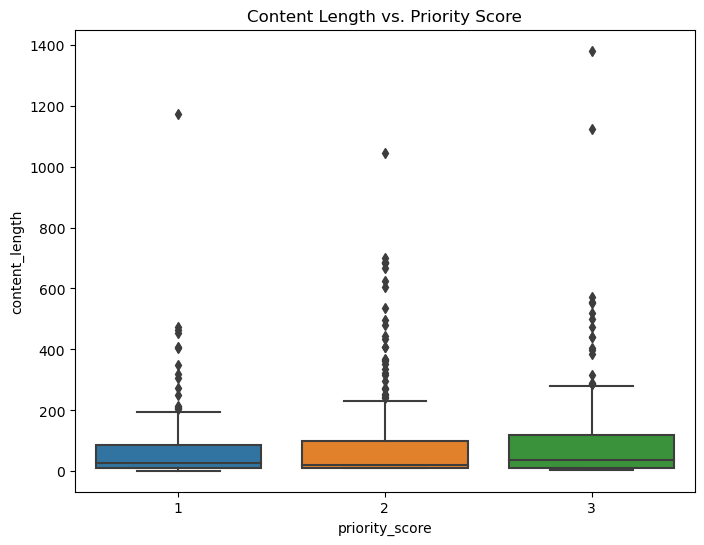

In [15]:
# Plot content length vs. priority score
plt.figure(figsize=(8, 6))
sns.boxplot(x='priority_score', y='content_length', data=data)
plt.title('Content Length vs. Priority Score')
plt.show()

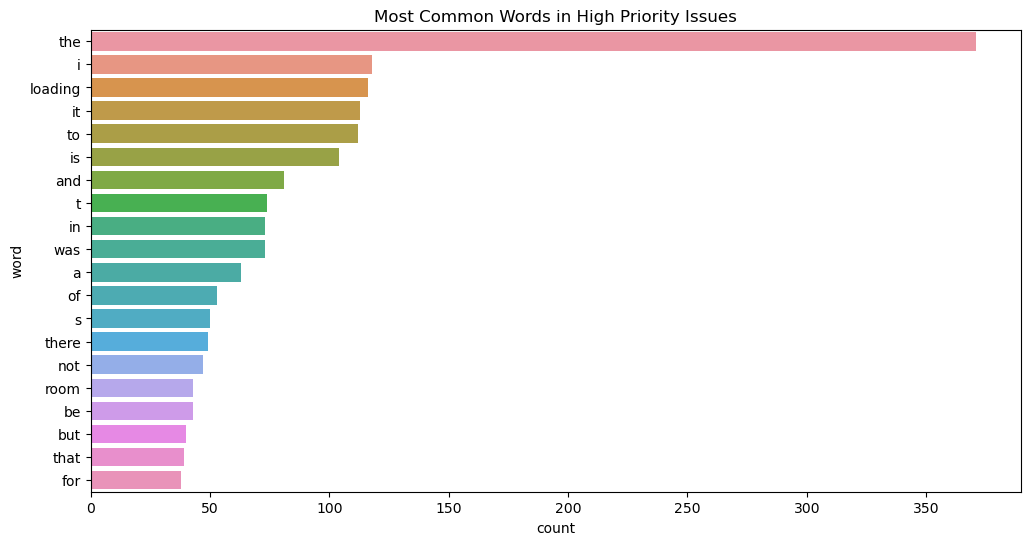

In [16]:
# Most common words in high priority issues (priority score = 3)
high_priority = data[data['priority_score'] == 3]
high_priority_text = " ".join(review for review in high_priority.translated_content)

words = re.findall(r'\w+', high_priority_text.lower())
common_words = Counter(words).most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words in High Priority Issues')
plt.show()

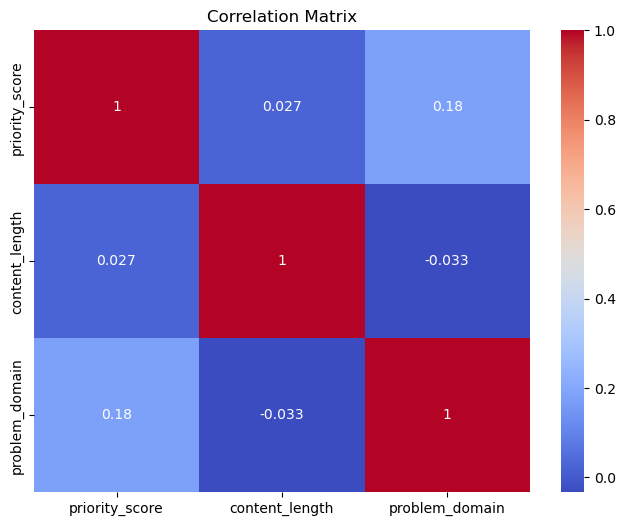

In [17]:
# Calculate correlation matrix
correlation_matrix = data[['priority_score', 'content_length', 'problem_domain']].corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [18]:
# Define target and features
X = data['translated_content']
y = data['priority_score'].apply(lambda x: 'high' if x == 3 else 'low')  # Example binary classification based on priority

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [20]:
# Train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [21]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

In [22]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.67      0.10      0.17        62
         low       0.57      0.96      0.72        78

    accuracy                           0.58       140
   macro avg       0.62      0.53      0.44       140
weighted avg       0.61      0.58      0.47       140



In [23]:
# Vectorize text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.67      0.03      0.06        62
         low       0.56      0.99      0.72        78

    accuracy                           0.56       140
   macro avg       0.61      0.51      0.39       140
weighted avg       0.61      0.56      0.43       140

